[View in Colaboratory](https://colab.research.google.com/github/dwy904/credit_risk_modeling_hcg/blob/master/Home_Credit_Default_Risk.ipynb)

In [67]:
# !pip install kaggle
# !pip install boto3
# !pip install pandas
# !pip install numpy

# !export PATH = "/content/.local/bin/kaggle"
# !export PATH = "/content/.local/lib/python3.6/site-packages/kaggle-1.3.12.dist-info/*"
# !export PATH = "/content/.local/lib/python3.6/site-packages/kaggle/*"
# !ln -s ~/.local/bin/kaggle /usr/bin/kaggle
# !wget https://github.com/fatenaught/home_risk/blob/master/kaggle.json
# !cp kaggle.json .kaggle 
# !chmod 755 .kaggle/kaggle.json
# !kaggle competitions download -c home-credit-default-risk


Unauthorized: you must download an API key from https://www.kaggle.com/<username>/account
Then put kaggle.json in the folder /content/.kaggle
total 88
drwxr-xr-x 1 root root  4096 Jul  3 22:30 .
drwxr-xr-x 1 root root  4096 Jul  3 16:55 ..
drwx------ 4 root root  4096 Jul  3 16:57 .cache
drwxr-xr-x 3 root root  4096 Jul  3 16:57 .config
drwxr-xr-x 3 root root  4096 Jul  2 16:56 datalab
drwxr-xr-x 4 root root  4096 Jul  3 16:56 .forever
drwxr-xr-x 5 root root  4096 Jul  3 16:57 .ipython
drwxr-xr-x 2 root root  4096 Jul  3 22:30 .kaggle
-rw-r--r-- 1 root root 41828 Jul  3 22:11 kaggle.json
drwx------ 6 root root  4096 Jul  3 16:59 .local
-rw-r--r-- 1 root root   165 Jul  3 22:11 .wget-hsts
total 52
drwxr-xr-x 2 root root  4096 Jul  3 22:30 .
drwxr-xr-x 1 root root  4096 Jul  3 22:30 ..
-rwxr-xr-x 1 root root 41828 Jul  3 22:30 kaggle.json


# Functions

In [0]:
def accuracy_check(score,cm):
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15);

# Data Setup

In [0]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [0]:
application_train_original = pd.read_csv("https://s3.amazonaws.com/home-risk/application_train.csv")
application_test = pd.read_csv("https://s3.amazonaws.com/home-risk/application_test.csv")
bureau = pd.read_csv("https://s3.amazonaws.com/home-risk/bureau.csv")
bureau_balance = pd.read_csv("https://s3.amazonaws.com/home-risk/bureau_balance.csv")
credit_card_balance = pd.read_csv("https://s3.amazonaws.com/home-risk/credit_card_balance.csv")
install_payments = pd.read_csv("https://s3.amazonaws.com/home-risk/installments_payments.csv")
previous_applications = pd.read_csv("https://s3.amazonaws.com/home-risk/previous_application.csv")
pos_cash = pd.read_csv("https://s3.amazonaws.com/home-risk/POS_CASH_balance.csv")

In [16]:
application_train_original.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
print(Counter(application_train_original['TARGET'])) #imbalanced issue
application_train = pd.get_dummies(application_train_original)
print(application_train.loc[:,application_train.columns[application_train.isnull().sum() > 0]].max().max() < 10000000)
application_train = application_train.fillna(10000000)

# print(application_train.isnull().values.any())
# print(application_train.shape)
# application_train = application_train.fillna(application_train.mean()['SK_ID_CURR':'AMT_REQ_CREDIT_BUREAU_YEAR'])
# print(application_train.dtypes)

Counter({0: 282686, 1: 24825})
True


# Models on Application Only

Linear Regression

In [0]:
application_data = application_train.drop(columns=['SK_ID_CURR', 'TARGET'])
application_target = application_train['TARGET']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(application_data, application_target, test_size= 0.25, random_state = 0)
model_logit = LogisticRegression(class_weight = 'balanced')
model_logit.fit(x_train,y_train)

[[0.55479113 0.44520887]
 [0.40814316 0.59185684]]


In [0]:
application_prediction = model_logit.predict(x_test)
logit_score = model_logit.score(x_test,y_test)
logit_cm = metrics.confusion_matrix(y_test,application_prediction)
logit_cm_normalized = logit_cm.astype('float')/logit_cm.sum(axis = 1)[:,np.newaxis]
print(logit_cm_normalized)

0.5577278285075054
[[0.55479113 0.44520887]
 [0.40814316 0.59185684]]


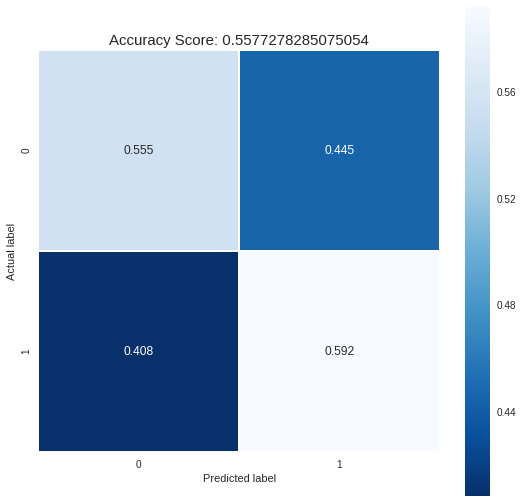

In [45]:
print(logit_score)
print(logit_cm_normalized)
accuracy_check(logit_score,logit_cm_normalized)

**Random Forest**

In [0]:
x_train_ori, x_test, y_train_ori, y_test  = train_test_split(application_data, application_target, test_size = 0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train_ori, y_train_ori, test_size=0.25, random_state=1)

In [0]:
model_rf_version = []
para_max_depth = []
para_n_tree = []
para_max_feature = []
metric_roc_val = []
metric_roc_train = []

i = 1
for value_n_tree in [5, 10, 15, 20, 25, 30]:
  for value_max_depth in [5, 10, 15, 20, 25, 30, None]:
    for value_max_feature in ['sqrt', 'log2', None]:
      
      model_rf = \
        RandomForestClassifier(class_weight = 'balanced', verbose = 0, n_jobs = -1, n_estimators = value_n_tree, 
                               max_depth = value_max_depth, max_features = value_max_feature)
      model_rf.fit(x_train, y_train)
      
      roc_val = metrics.roc_auc_score(y_val, [i[1] for i in model_rf.predict_proba(x_val)]).round(3)
      roc_train = metrics.roc_auc_score(y_train, [i[1] for i in model_rf.predict_proba(x_train)]).round(3)
      
      model_rf_version.append(model_rf)
      para_max_depth.append(value_max_depth)
      para_n_tree.append(value_n_tree)
      para_max_feature.append(str(value_max_feature))
      metric_roc_val.append(roc_val)
      metric_roc_train.append(roc_train)
      
      print('iter', i, '=>', 'max_depth:', value_max_depth, 'n_tree:', value_n_tree, 'max_feature:', value_max_feature,
            'train_roc:', roc_train, 'val_roc:', roc_val)
      i += 1           

iter 1 => max_depth: 5 n_tree: 5 max_feature: sqrt train_roc: 0.687 val_roc: 0.682
iter 2 => max_depth: 5 n_tree: 5 max_feature: log2 train_roc: 0.668 val_roc: 0.661
iter 3 => max_depth: 5 n_tree: 5 max_feature: None train_roc: 0.718 val_roc: 0.717
iter 4 => max_depth: 10 n_tree: 5 max_feature: sqrt train_roc: 0.771 val_roc: 0.706
iter 5 => max_depth: 10 n_tree: 5 max_feature: log2 train_roc: 0.743 val_roc: 0.679
iter 6 => max_depth: 10 n_tree: 5 max_feature: None train_roc: 0.796 val_roc: 0.717
iter 7 => max_depth: 15 n_tree: 5 max_feature: sqrt train_roc: 0.875 val_roc: 0.666
iter 8 => max_depth: 15 n_tree: 5 max_feature: log2 train_roc: 0.826 val_roc: 0.651
iter 9 => max_depth: 15 n_tree: 5 max_feature: None train_roc: 0.913 val_roc: 0.687
iter 10 => max_depth: 20 n_tree: 5 max_feature: sqrt train_roc: 0.954 val_roc: 0.644
iter 11 => max_depth: 20 n_tree: 5 max_feature: log2 train_roc: 0.919 val_roc: 0.628
iter 12 => max_depth: 20 n_tree: 5 max_feature: None train_roc: 0.966 val_roc

In [98]:
# test script
model_rf = RandomForestClassifier(class_weight = 'balanced', verbose = 0, n_jobs = 20)
model_rf.fit(x_train, y_train)
metrics.roc_auc_score(y_val, [i[1] for i in model_rf.predict_proba(x_val)])
metrics.confusion_matrix(list(y_test == 1), [i[1] > 0.9 for i in model_rf.predict_proba(x_test)])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=20, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [0]:
feature_importance = pd.DataFrame(x_train.columns, columns=['feature_name'])
feature_importance['importance'] = model_rf.feature_importances_
feature_importance.sort_values(by = 'importance', ascending = False)